In [2]:
from __future__ import division, print_function

import numpy as np
import matplotlib.pyplot as plt
from pymatgen.core import Element, Composition

%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [12]:
Si=Element('Si')


In [24]:
elems=[Element(str(e.symbol)) for e in Composition('FeO')]

In [26]:
elems[0].melting_point

54.8

In [22]:
O.melting_point

54.8

# ICSD Ternary Compounds

Downloaded a snapshot (2016 Jun 30) of all ternary compounds contained in the ICSD database.

In [27]:
from collections import Counter

def composition_to_tuple(name):
    return tuple(sorted([e.symbol for e in Composition(name)]))

def phasediag_distribution(compounds, N_universe):
    counts = Counter([composition_to_tuple(c) for c in compounds])
    hist = Counter(counts.values())
    hist[0] = N_universe - len(counts)  # add point corresponding to universe
    return hist

In [28]:
# Generate list of non-radioactive elements (noble gases omitted)

def desired_element(elem):
    omit = ['Po', 'At', 'Rn', 'Fr', 'Ra']
    return not e.is_noble_gas and not e.is_actinoid and not e.symbol in omit

element_universe = [e for e in Element if desired_element(e)]
omitted_elements = [e for e in Element if e not in element_universe]

print("Number of included elements =", len(element_universe))
print("Omitted elements:", " ".join(sorted([e.symbol for e in omitted_elements])))

Number of included elements = 78
Omitted elements: Ac Am Ar At Bk Cf Cm Es Fm Fr He Kr Lr Md Ne No Np Pa Po Pu Ra Rn Th U Xe


In [5]:
import csv

with open("ICSD/icsd-ternaries.csv", "r") as f:
    csv_reader = csv.reader(f, dialect = csv.excel_tab)
    data = [line for line in csv_reader]

In [6]:
formulas = [line[2] for line in data]
compositions = [Composition(x) for x in formulas]
unique_formulas = list(set(formulas))
unique_compositions = set(Composition(f).formula for f in unique_formulas)

In [7]:
print("Number of formulas:", len(formulas))
print("Number of unique formulas:", len(unique_formulas))
print("Number of unique compositions:", len(unique_compositions))

Number of formulas: 68064
Number of unique formulas: 46364
Number of unique compositions: 42035


In [8]:
# filter by elements that I care care about -- remove radioactive elements

omitted_Elements = [Element(e) for e in omitted_elements]
omitted_ternaries = [c for c in unique_formulas if any((e in omitted_Elements) for e in Composition(c))]
icsd_ternaries = [c for c in unique_formulas if c not in omitted_ternaries]

print("Number of omitted ternaries =", len(omitted_ternaries))
print("Examples:", omitted_ternaries[:5])

Number of omitted ternaries = 2264
Examples: ['U Pd2 S4', 'La9.84 U1.236 S16', '(Al1.5 Cu1.5) Cu2  U', 'Ru Pu B4', '(U0.67 Ce0.33) C2']


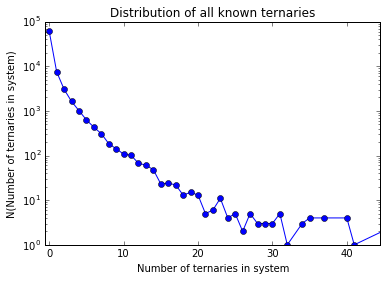

In [9]:
from scipy.misc import comb

N_ternary_diagrams = int(comb(len(element_universe), 3))  # N choose 3 = number of ternary phase diagrams
hist = phasediag_distribution(unique_compositions, N_ternary_diagrams)
xx, yy = np.array(hist.items()).T
plt.semilogy(xx, yy, 'o-')
plt.xlim(-0.5, len(xx) - 0.5)
plt.xlabel("Number of ternaries in system")
plt.ylabel("N(Number of ternaries in system)")
plt.title("Distribution of all known ternaries")

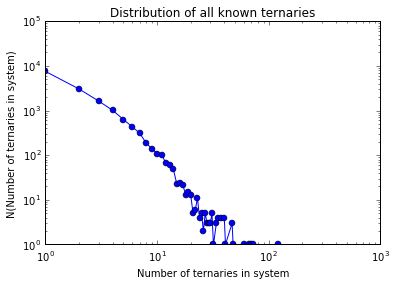

In [93]:
plt.loglog(xx, yy, 'o-')
plt.xlabel("Number of ternaries in system")
plt.ylabel("N(Number of ternaries in system)")
plt.title("Distribution of all known ternaries")

In [94]:
def filter_one_element(symbol, universe):
    return [c for c in universe if Element(symbol) in Composition(c)]

N_diagrams = int(comb(len(element_universe)-1, 2))

anions = ["O", "S", "Se", "F", "Cl", "Br", "I", "N", "P", "C"]
grouped = [filter_one_element(X, icsd_ternaries) for X in anions]
hists = [phasediag_distribution(compounds, N_diagrams) for compounds in grouped]

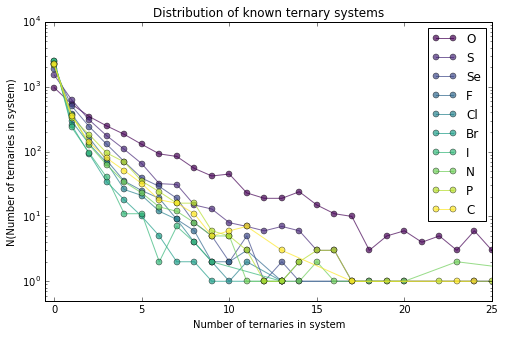

In [107]:
plt.figure(figsize = (8,5))

for i,hist in enumerate(hists):
    points = sorted(hist.iteritems(), key = lambda x: x[0])
    xx = [e[0] for e in points]
    yy = [e[1] for e in points]
    plt.semilogy(xx, yy, 'o-', label = anions[i],
                 color = plt.cm.viridis(i/(len(anions)-1)), alpha = 0.7)

plt.xlim(-0.5, 25)
plt.ylim(0.5, None)
plt.legend(loc = "best")
plt.xlabel("Number of ternaries in system")
plt.ylabel("N(Number of ternaries in system)")
plt.title("Distribution of known ternary systems")